Data prep and cleaning – prior to exploring the data, you should ensure 
that the dataset is clean, all variables are in their proper format, and the data 
is free of missing, abnormal, or outlier values. 
 Exploratory data analysis – you should explore every aspect of the data to 
determine the features of the data, the range of values for all variables of 
interest, and the relationships between variables. Exploration should be 
conducted outside of predictive modeling – in other words, you are not only 
interested in how the dependent and independent variables interact – you 
should also spend some time exploring variations in the data among 
variables (i.e. how does salary differ between genders? Does time spent in 
the company differ by job role?)
 Modeling – after thoroughly exploring the data, create a logistic regression 
model that predicts employee attrition based on the other variables available 
to you. Clearly interpret your model findings. Re-run/tweak your model if you 
think you can find a better fit. 
 Visualization – Create at least 3 visualizations that highlight some of the 
most interesting findings in your dataset. These can be findings from the 
regression model or any interesting relationships between variables. 

In [33]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

################

df = pd.read_excel("IBM Employee Attrition.xlsx")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [35]:
#is there any missing data

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [36]:
df[['Attrition']].value_counts()

Attrition
No           1233
Yes           237
dtype: int64

In [37]:
df[['JobSatisfaction']].value_counts()

JobSatisfaction
4                  459
3                  442
1                  289
2                  280
dtype: int64

In [38]:
pd.crosstab(df["JobSatisfaction"], df["Attrition"], margins = True)


Attrition,No,Yes,All
JobSatisfaction,,,
1,223,66,289
2,234,46,280
3,369,73,442
4,407,52,459
All,1233,237,1470


In [39]:
df[['TotalWorkingYears']].value_counts()

TotalWorkingYears
10                   202
6                    125
8                    103
9                     96
5                     88
7                     81
1                     81
4                     63
12                    48
3                     42
15                    40
16                    37
13                    36
11                    36
21                    34
17                    33
14                    31
2                     31
20                    30
18                    27
19                    22
23                    22
22                    21
24                    18
28                    14
25                    14
26                    14
0                     11
29                    10
31                     9
32                     9
27                     7
30                     7
33                     7
36                     6
34                     5
37                     4
35                     3
40                     2
38     

In [40]:
pd.crosstab(df["TotalWorkingYears"], df["Attrition"], margins = True)

Attrition,No,Yes,All
TotalWorkingYears,,,
0,6,5,11
1,41,40,81
2,22,9,31
3,33,9,42
4,51,12,63
5,72,16,88
6,103,22,125
7,63,18,81
8,87,16,103


In [57]:
df[["DistanceFromHome"]].value_counts()

DistanceFromHome
2                   211
1                   208
10                   86
9                    85
3                    84
7                    84
8                    80
5                    65
4                    64
6                    59
16                   32
11                   29
24                   28
23                   27
29                   27
18                   26
15                   26
20                   25
25                   25
26                   25
28                   23
19                   22
14                   21
17                   20
12                   20
22                   19
13                   19
21                   18
27                   12
dtype: int64

In [58]:
pd.crosstab(df["DistanceFromHome"], df["Attrition"], margins = True)

Attrition,No,Yes,All
DistanceFromHome,,,
1,182,26,208
2,183,28,211
3,70,14,84
4,55,9,64
5,55,10,65
6,52,7,59
7,73,11,84
8,70,10,80
9,67,18,85


In [64]:
bins = [9, 19, 25, 29, 36]
bin_names = ["ShortCommute", "AverageCommute", "LongCommute", "VeryLongCommute"]

df["Commute_Distance_Group"] = pd.cut(df["DistanceFromHome"], bins, labels=bin_names)

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Group,Commute_Distance_Group
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,0,8,0,1,6,4,0,5,Millennial,NaN
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,1,10,3,3,10,7,1,7,Older Millennial,NaN
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,0,7,3,3,0,0,0,0,Millennial,NaN
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,0,8,3,3,8,7,3,0,Gen Z,NaN
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,1,6,3,3,2,2,2,2,Gen Z,NaN


<AxesSubplot:xlabel='Attrition', ylabel='count'>

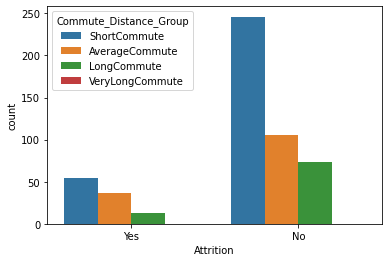

In [65]:
#sns.countplot(data = df, x = "survived", hue = "sex")
#plt.title('survival by sex')

sns.countplot(data = df, x = "Attrition", hue = "Commute_Distance_Group")

<AxesSubplot:xlabel='Attrition', ylabel='count'>

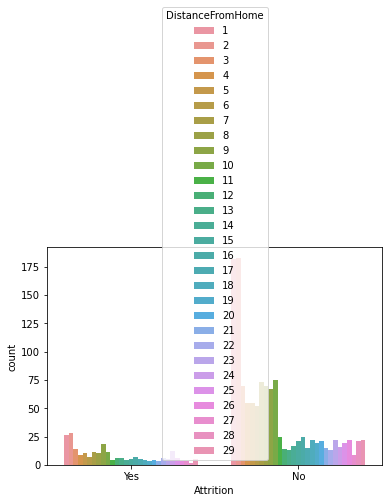

In [59]:
#sns.countplot(data = df, x = "survived", hue = "sex")
#plt.title('survival by sex')

sns.countplot(data = df, x = "Attrition", hue = "DistanceFromHome")

In [41]:
df[["PerformanceRating"]].value_counts()

PerformanceRating
3                    1244
4                     226
dtype: int64

In [42]:
pd.crosstab(df["PerformanceRating"], df["Attrition"], margins = True)

Attrition,No,Yes,All
PerformanceRating,,,
3,1044,200,1244
4,189,37,226
All,1233,237,1470


In [43]:
pd.crosstab(df["Age"], df["Attrition"], margins = True)

Attrition,No,Yes,All
Age,,,
18,4,4,8
19,3,6,9
20,5,6,11
21,7,6,13
22,11,5,16
23,10,4,14
24,19,7,26
25,20,6,26
26,27,12,39


In [44]:
df[['Age']].value_counts()

Age
35     78
34     77
36     69
31     69
29     68
32     61
30     60
38     58
33     58
40     57
37     50
27     48
28     48
42     46
39     42
45     41
41     40
26     39
44     33
46     33
43     32
50     30
24     26
25     26
47     24
49     24
55     22
53     19
48     19
51     19
52     18
54     18
22     16
56     14
23     14
58     14
21     13
20     11
59     10
19      9
18      8
60      5
57      4
dtype: int64

In [45]:
bins = [18, 26, 34, 45, 55, 60, 100]
bin_names = ["First Job", "Gen Z", "Millennial", "Older Millennial", "Gen X", "Baby Boomer"]

df["Age_Group"] = pd.cut(df["Age"], bins, labels=bin_names)

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Group
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,1,0,8,0,1,6,4,0,5,Millennial
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,1,10,3,3,10,7,1,7,Older Millennial
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,2,0,7,3,3,0,0,0,0,Millennial
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,0,8,3,3,8,7,3,0,Gen Z
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,4,1,6,3,3,2,2,2,2,Gen Z


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Group
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,1,0,8,0,1,6,4,0,5,Millennial
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,1,10,3,3,10,7,1,7,Older Millennial
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,2,0,7,3,3,0,0,0,0,Millennial
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,0,8,3,3,8,7,3,0,Gen Z
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,4,1,6,3,3,2,2,2,2,Gen Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,...,3,1,17,3,3,5,2,0,3,Millennial
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,...,1,1,9,5,3,7,7,1,7,Millennial
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,...,2,1,6,0,3,6,2,0,3,Gen Z
1468,49,No,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,...,4,0,17,3,2,9,6,0,8,Older Millennial


In [47]:
pd.crosstab(df["JobInvolvement"], df["Attrition"], margins = True)

Attrition,No,Yes,All
JobInvolvement,,,
1,55,28,83
2,304,71,375
3,743,125,868
4,131,13,144
All,1233,237,1470


In [69]:
bins = [1, 2, 3, 4, 5]
bin_names = ["Low", "Medium", "High", "VeryHigh"]

df["Job_Involvement_Rating"] = pd.cut(df["JobInvolvement"], bins, labels=bin_names)

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Group,Commute_Distance_Group,Job_Involvement_Rating
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,8,0,1,6,4,0,5,Millennial,NaN,Medium
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,10,3,3,10,7,1,7,Older Millennial,NaN,Low
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,7,3,3,0,0,0,0,Millennial,NaN,Low
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,8,3,3,8,7,3,0,Gen Z,NaN,Medium
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,6,3,3,2,2,2,2,Gen Z,NaN,Medium


<AxesSubplot:xlabel='Attrition', ylabel='count'>

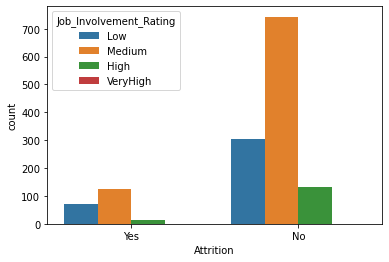

In [70]:
#sns.countplot(data = df, x = "survived", hue = "sex")
#plt.title('survival by sex')

sns.countplot(data = df, x = "Attrition", hue = "Job_Involvement_Rating")

In [48]:
pd.crosstab(df["YearsSinceLastPromotion"], df["Attrition"], margins = True)

Attrition,No,Yes,All
YearsSinceLastPromotion,,,
0,471,110,581
1,308,49,357
2,132,27,159
3,43,9,52
4,56,5,61
5,43,2,45
6,26,6,32
7,60,16,76
8,18,0,18


In [79]:
bins = [3, 5, 7, 10, 15]
bin_names = ["HighGrowthOpportunity", "MediumGrowthOpportunity", "LittleGrowthOpportunity", "NoGrowthOpportunity"]

df["Job_Growth_Opportunities"] = pd.cut(df["YearsSinceLastPromotion"], bins, labels=bin_names)

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Group,Commute_Distance_Group,Job_Involvement_Rating,Job_Growth_Opportunities
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,0,1,6,4,0,5,Millennial,NaN,Medium,NaN
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,3,3,10,7,1,7,Older Millennial,NaN,Low,NaN
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,3,0,0,0,0,Millennial,NaN,Low,NaN
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,8,7,3,0,Gen Z,NaN,Medium,NaN
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,3,2,2,2,2,Gen Z,NaN,Medium,NaN


<AxesSubplot:xlabel='Attrition', ylabel='count'>

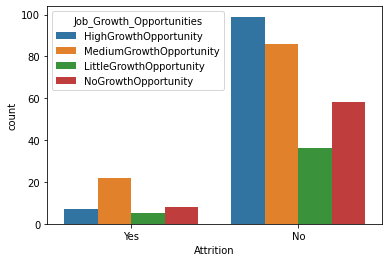

In [81]:
sns.countplot(data = df, x = "Attrition", hue = "Job_Growth_Opportunities")

In [80]:
pd.crosstab(df["Age_Group"], df["Attrition"], normalize = True)

Attrition,No,Yes
Age_Group,,
First Job,0.069767,0.035568
Gen Z,0.270178,0.064295
Millennial,0.337209,0.036252
Older Millennial,0.136799,0.017784
Gen X,0.026676,0.005472


<AxesSubplot:xlabel='Attrition', ylabel='count'>

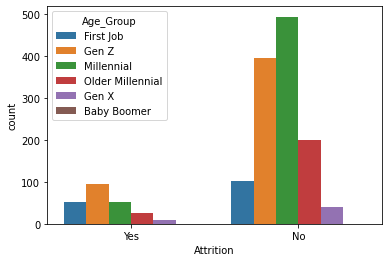

In [55]:
#sns.countplot(data = df, x = "survived", hue = "sex")
#plt.title('survival by sex')

sns.countplot(data = df, x = "Attrition", hue = "Age_Group")


In [52]:
df[["Age_Group"]].value_counts()

Age_Group       
Millennial          546
Gen Z               489
Older Millennial    226
First Job           154
Gen X                47
Baby Boomer           0
dtype: int64

In [53]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000
